## Chapter 7 Context analysis

### Preprocessing text

Data Preprocessing
Before we start, here is the list of Text Preprocessing Steps:

- Regular Expression/Normalization — lowercase the words, remove punctuation and remove numbers
- Tokenization — a process of splitting the text into smaller pieces called tokens
- Stop Words Removal — a set of commonly used words in any language
- Lemmatization — a process of grouping together the inflected forms of a word so they can be analyzed as a single item
- *Stemming — a process of grouping together the inflected forms of a word so they can be analyzed as a single item

In [2]:
from deep_translator import GoogleTranslator
import re
import pandas as pd
import json
import os
from math import pi
import numpy  as np

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import preprocessor as p
from nltk.tokenize import TweetTokenizer
from gensim.parsing.preprocessing import remove_stopwords

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /Users/sha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
twitter_data_dir = "../data/tweets/"

all_search_data_dir = '../data/tweets/all_search_city/'
all_account_data_dir = '../data/tweets/all_account_city/'
all_search_files = [f for f in os.listdir(all_search_data_dir) if f.endswith('.csv')]
all_account_files = [f for f in os.listdir(all_account_data_dir) if f.endswith('.csv')]


## Translate tweets

In [ ]:
def translate_tweets(all_data_dir,all_flies,twitter_data_dir):
    for i in range(0,len(all_files)):
        f = all_search_files[i]
        df_tweets = pd.read_csv(all_data_dir+f,low_memory=False)

        rt_index = df_tweets[df_tweets["retweeted_status"].notna()].index.tolist()
        org_index = df_tweets[df_tweets["retweeted_status"].isna() | df_tweets['is_quote_status'] ].index.tolist()

        df_tweets.loc[rt_index,'retweeted_status'] = df_tweets.loc[rt_index,'retweeted_status'].map(lambda x: ast.literal_eval(x))

        df_tweets['translated_org'] = ''
        df_tweets['translated_rt'] = ''
        df_tweets.loc[org_index,'translated_org'] = df_tweets.loc[org_index,'full_text'].map(lambda x: GoogleTranslator(source='auto', target='en').translate(x))
        df_tweets.loc[rt_index,'translated_rt'] = df_tweets.loc[rt_index,'retweeted_status'].map(lambda x: GoogleTranslator(source='auto', target='en').translate(x['full_text']))

        df_tweets.to_csv(twitter_data_dir+"translated_search_city/"+f)
    
translate_tweets(all_search_data_dir,all_search_files,twitter_data_dir)    
translate_tweets(all_account_data_dir,all_account_files,twitter_data_dir)    

## Prepocessing tranlated tweets

In [3]:
account_data_dir = twitter_data_dir+"translated_account_city/"
account_files = [f for f in os.listdir(account_data_dir) if f.endswith('.csv')]
search_data_dir = twitter_data_dir+"translated_search_city/"
search_files = [f for f in os.listdir(search_data_dir) if f.endswith('.csv')]

In [4]:
def preprocessing_data(types,files,data_dir):
    punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@' +'#'
    tokenizer=TweetTokenizer()
    lemmatizer = WordNetLemmatizer()


    for i in range(len(files)):
            f = files[i]

            df_tweets = pd.read_csv(data_dir+f,low_memory=False)
            if 'translated_rt' in df_tweets.keys():
                df_tweets.loc[ df_tweets['translated_rt'].isna(),'translated_rt'] = ''
            else:
                df_tweets['translated_rt'] = ''

            df_tweets.loc[ df_tweets['translated_org'].isna(),'translated_org'] = ''
            df_tweets['translated_text'] = df_tweets[['translated_org', 'translated_rt']].apply(lambda x: ''.join(x), axis=1)


            #clean tweets url mention etc.
            # p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.EMOJI, p.OPT.SMILEY ,p.OPT.NUMBER) #Hashtag won't be removes
            df_tweets['text_processed'] = df_tweets['translated_text'].apply(str).map(lambda x: p.clean(x))

            #lower case
            df_tweets['text_processed'] = df_tweets['text_processed'].map(lambda x: x.lower())
            # strip punctuation and remove double spacing
            df_tweets['text_processed'] = df_tweets['text_processed'].map(lambda x: re.sub('[' + punctuation + ']+', ' ', x))
            df_tweets['text_processed'] = df_tweets['text_processed'].map(lambda x: re.sub('\s+', ' ', x))

            #remove stop words
            df_tweets['text_processed'] = df_tweets['text_processed'].map(lambda x: remove_stopwords(x))

            #tockenize
            df_tweets['text_processed'] = df_tweets['text_processed'].map(lambda x: tokenizer.tokenize(x))

            #lemmatization
            df_tweets['text_processed'] = df_tweets['text_processed'].map(lambda x: [lemmatizer.lemmatize(word, pos = "v") for word in x if len(word)>2])
            tweets_storage_file = twitter_data_dir + "processed_"+types+"_tweets/"+ "processed_" + f 
            df_tweets[['id','user','translated_text','text_processed']].to_csv(tweets_storage_file,index=False)
            print(tweets_storage_file)


In [5]:
preprocessing_data('account',account_files,account_data_dir)
preprocessing_data('search',search_files,search_data_dir)

tweets/processed_account_tweets/processed_Amsterdam_account_3364.csv
tweets/processed_account_tweets/processed_Stockholm_account_3907.csv
tweets/processed_account_tweets/processed_London_account_12244.csv
tweets/processed_account_tweets/processed_Lisbon_account_3286.csv
tweets/processed_account_tweets/processed_Bern_account_3354.csv
tweets/processed_account_tweets/processed_Warsaw_account_3507.csv
tweets/processed_account_tweets/processed_Vienna_account_3955.csv
tweets/processed_account_tweets/processed_Oslo_account_4188.csv
tweets/processed_account_tweets/processed_Helsinki_account_3401.csv
tweets/processed_account_tweets/processed_Copenhagen_account_3448.csv
tweets/processed_account_tweets/processed_Riga_account_3238.csv
tweets/processed_account_tweets/processed_Roma_account_6399.csv
tweets/processed_account_tweets/processed_Paris_account_3552.csv
tweets/processed_account_tweets/processed_Berlin_account_6947.csv
tweets/processed_account_tweets/processed_Prague_account_365.csv
tweets/

### Topic modelling - BERTopic

-  with some tricks
https://maartengr.github.io/BERTopic/getting_started/tips_and_tricks/tips_and_tricks.html#lightweight-installation

- usage
https://grabngoinfo.com/hyperparameter-tuning-for-bertopic-model-in-python/
https://www.vennify.ai/bertopic-topic-modeling/

In [6]:
account_data_dir = twitter_data_dir+"processed_account_tweets/"
account_files = [f for f in os.listdir(account_data_dir) if f.endswith('.csv')]
search_data_dir = twitter_data_dir+"processed_search_tweets/"
search_files = [f for f in os.listdir(search_data_dir) if f.endswith('.csv')]

/Users/sha/miniconda3/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/sha/miniconda3/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/sha/miniconda3/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWarning:

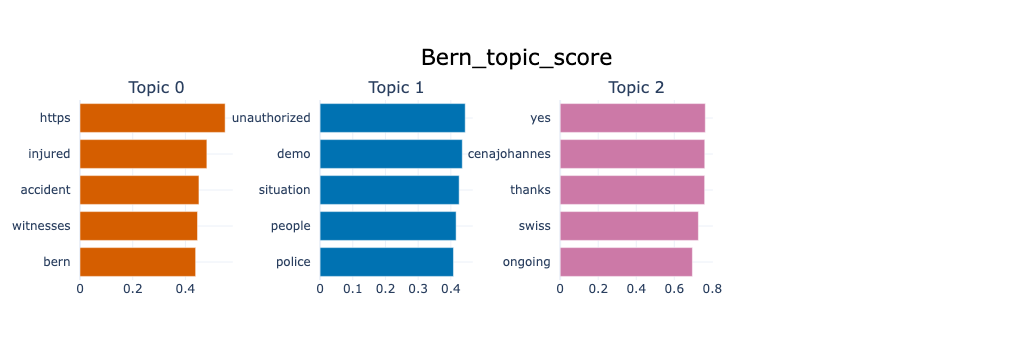

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


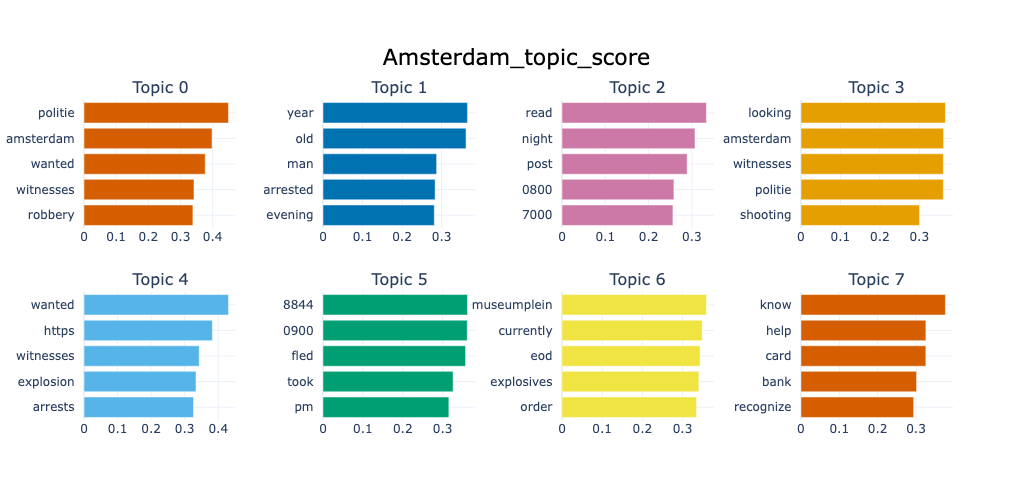

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


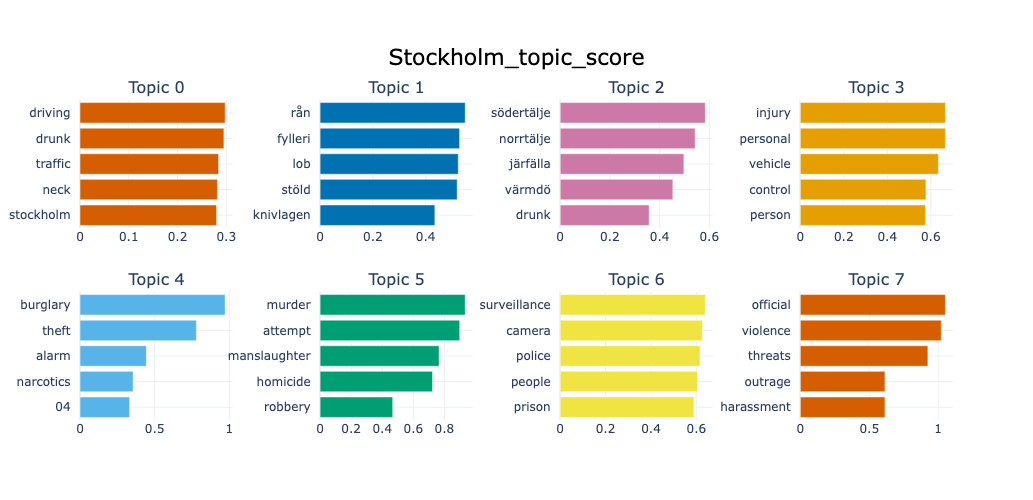

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


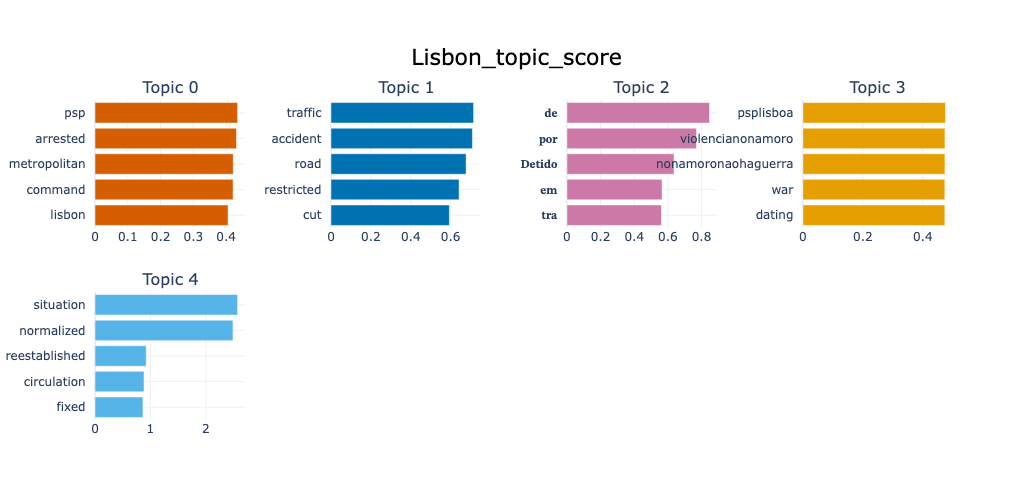

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


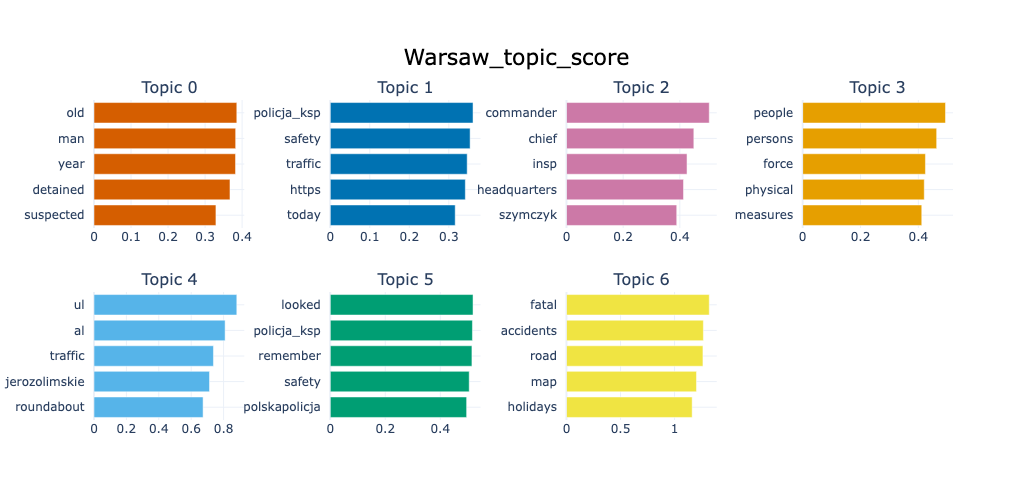

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


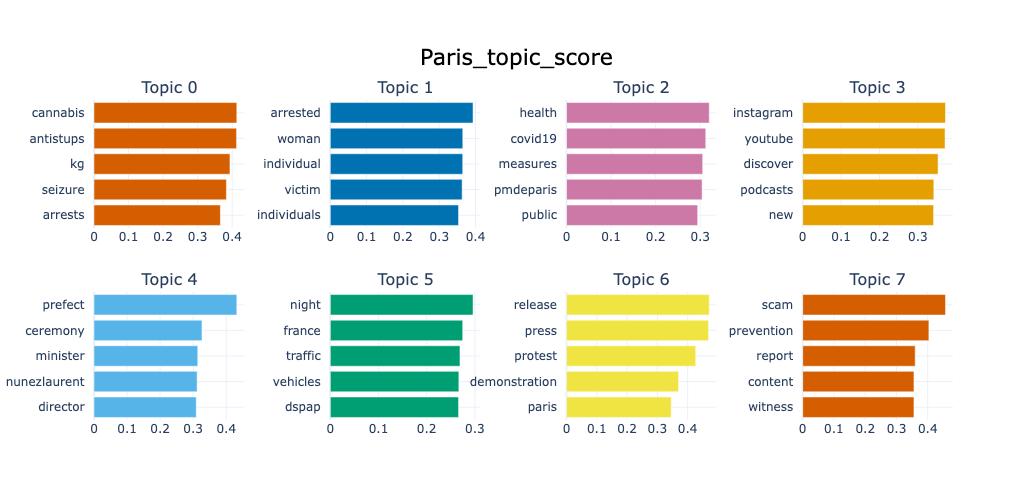

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


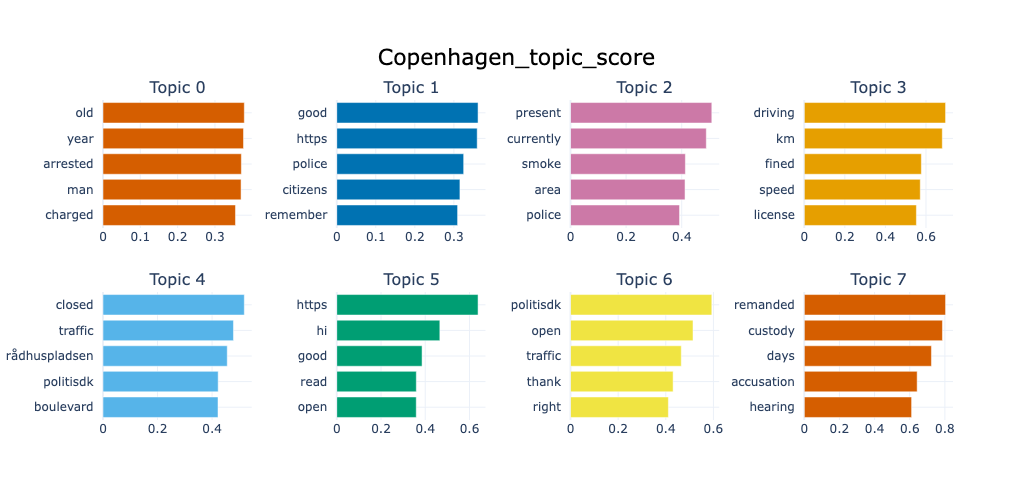

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


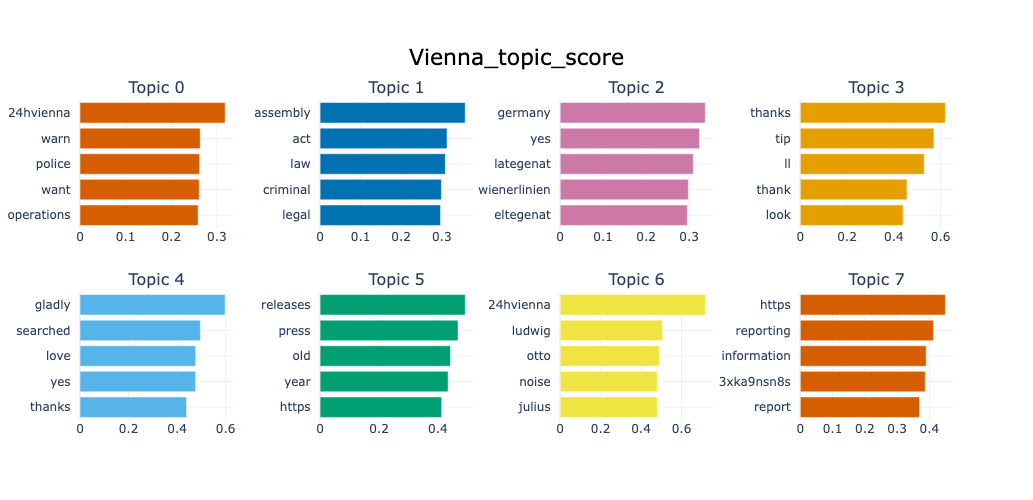

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


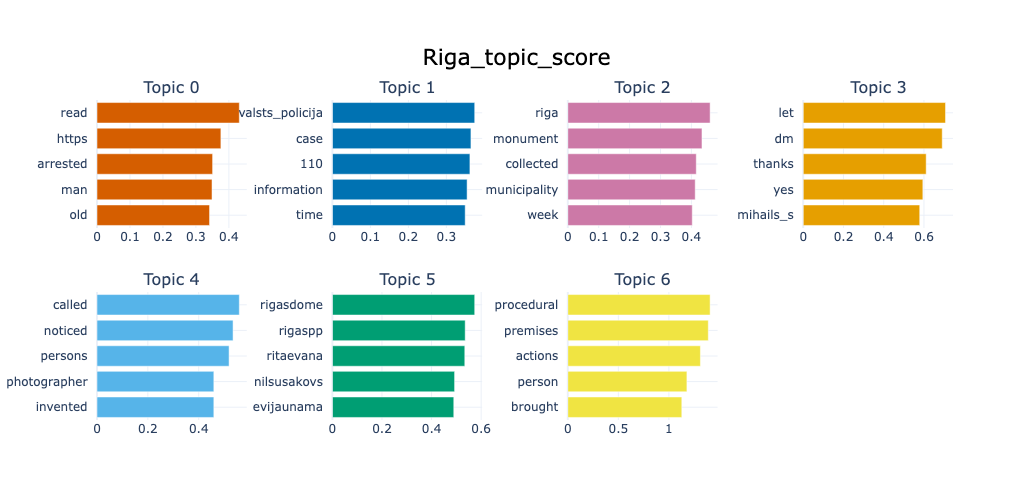

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


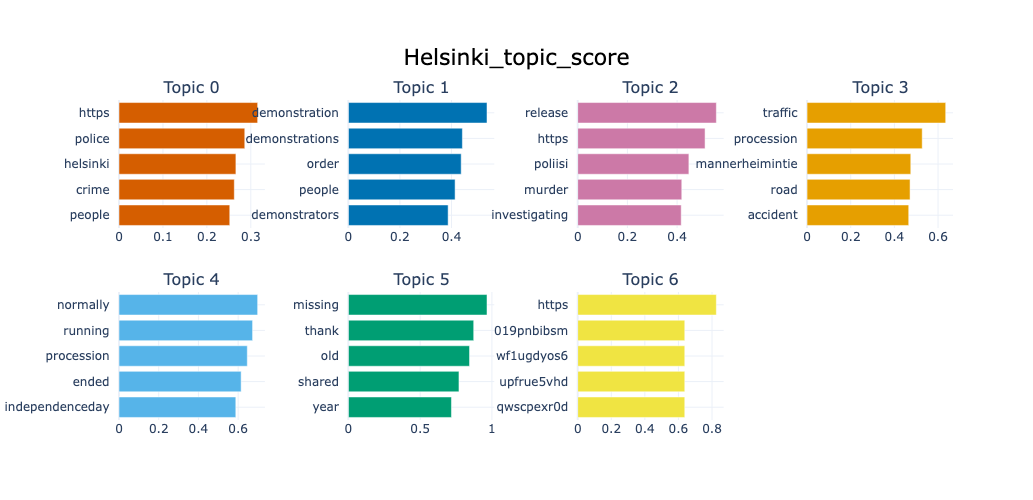

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


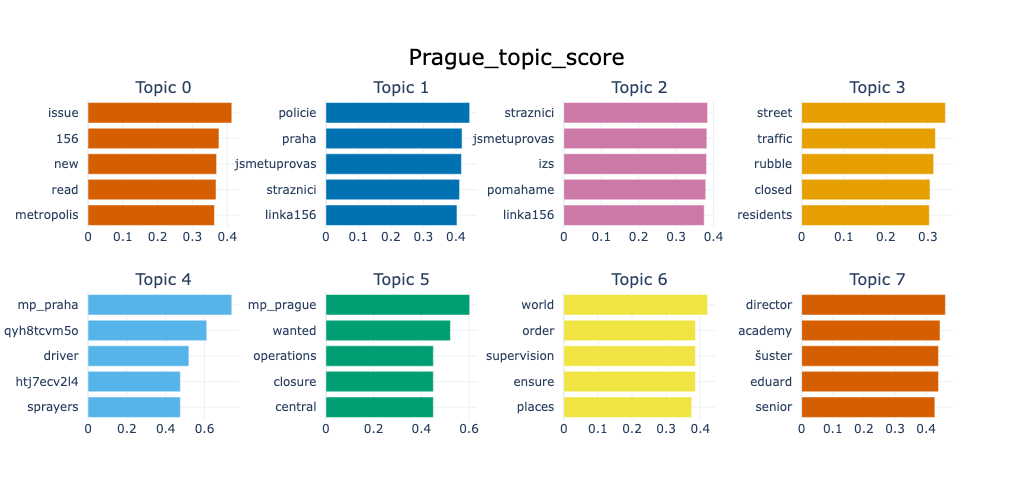

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


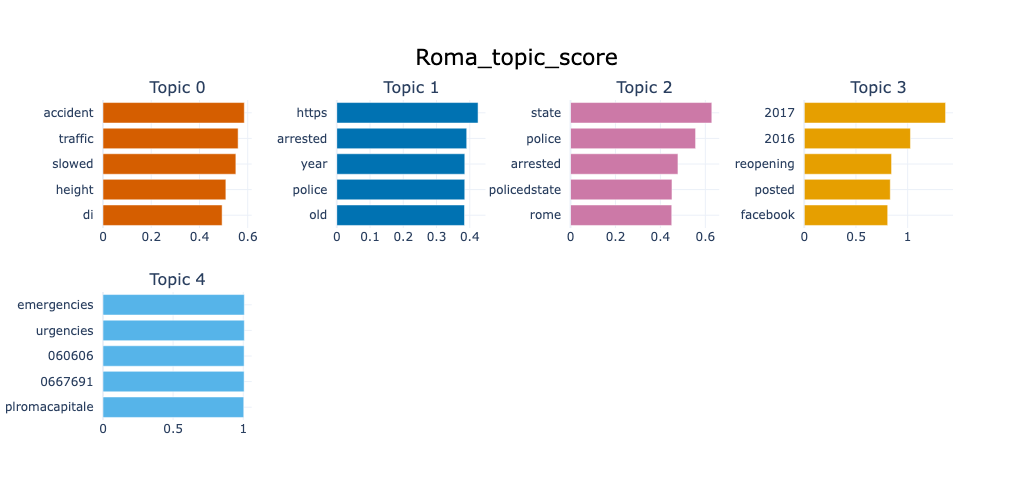

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


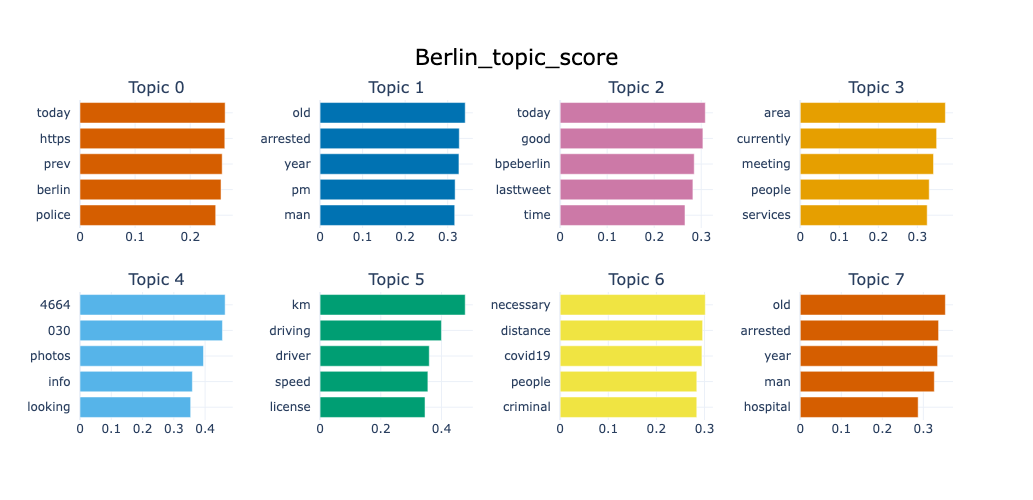

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


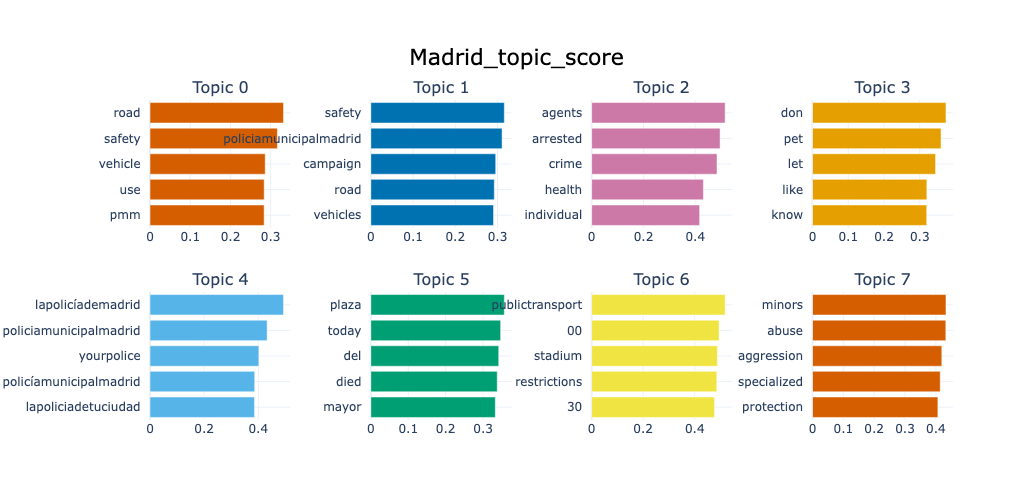

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


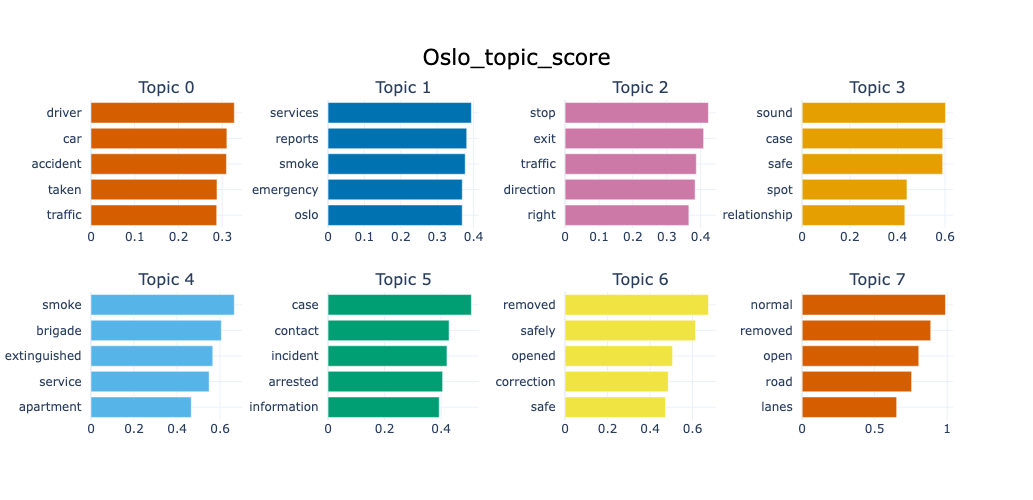

No sentence-transformers model found with name /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/sha/.cache/torch/sentence_transformers/cardiffnlp_twitter-roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


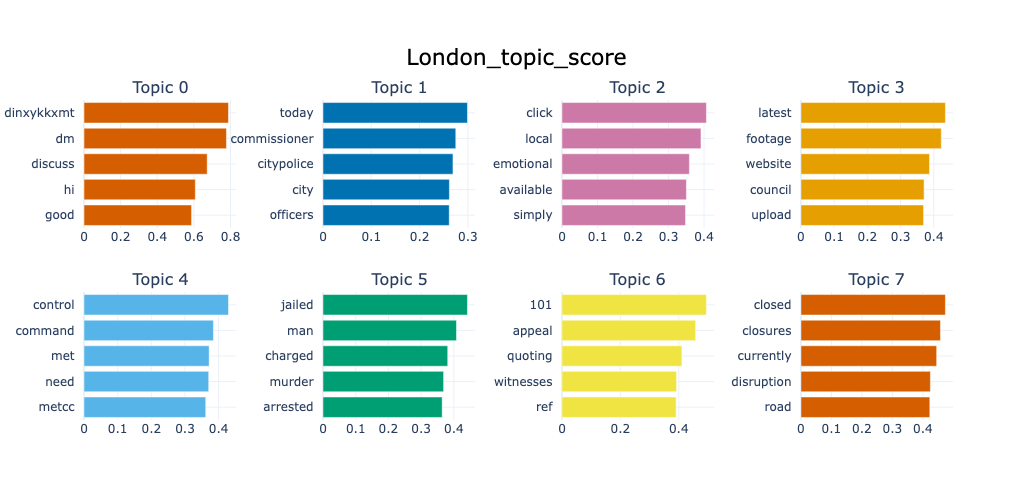

In [7]:
# Traine model

import plotly.io as pio
import umap.umap_ as umap
import hdbscan
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import MaximalMarginalRelevance
from bertopic import BERTopic

BERtopic_dir = '../analysis_result/BERTopics2/'

vectorizer_model = CountVectorizer(ngram_range=(1, 1), stop_words="english")
# reduce the impact of frequent words
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Create representation model
# representation_model = KeyBERTInspired()
representation_model = MaximalMarginalRelevance(diversity=0.2)

# Create a sentence transformer model
sentence_model = SentenceTransformer('cardiffnlp/twitter-roberta-base')
pca_model = PCA(n_components=20)
kmeans_model = KMeans(n_clusters=14)

hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10,
                                min_samples=1,
                                metric='euclidean',
                                cluster_selection_method='eom',
                                prediction_data=True)
account_topics_all_city = pd.DataFrame()

list_of_model = []
city_list = []

for f in account_files:
    city_name = f.split('_')[1]

    # Load  Twitter data into a pandas DataFrame
    df_tweets = pd.read_csv((account_data_dir+f))
    
    # Create a sentence transformer model
    sentence_model = SentenceTransformer('cardiffnlp/twitter-roberta-base')
    topic_model = BERTopic(embedding_model=sentence_model,
                           ctfidf_model=ctfidf_model,
                           representation_model = KeyBERTInspired,
                           vectorizer_model=vectorizer_model,
                           # min_topic_size=50,
                           nr_topics = 'auto',
                           # umap_model=umap_model,hdbscan_model=kmeans_model)
                           hdbscan_model=kmeans_model,
                           umap_model=pca_model)
    
   
    #  'translated_text' is the column that contains the text of tweets
    docs= df_tweets['translated_text'].dropna().astype(str)
     # Fit the model to your data
    topics, probabilities = topic_model.fit_transform(docs)

    # Get the most frequent topics
    topic_freq = topic_model.get_topic_info(); 
    topic_freq.to_csv(BERtopic_dir+city_name+'_BERTopics.csv',index=False)

    # topic_model.visualize_topics()
    fig=topic_model.visualize_barchart(title = city_name+'_topic_score')# n_words=10,top_n_topics = 10
    fig.show()
    # Save the figure as a png image:
    pio.write_image(fig, BERtopic_dir+city_name+'topic_model.png')
    
    topic_freq['city_name'] = city_name
    account_topics_all_city = pd.concat([account_topics_all_city,topic_freq])
    
    city_list += [city_name]
    list_of_model += [topic_model]
    
account_topic_model = pd.DataFrame({ 'city': city_list, 'model': list_of_model })

In [1]:
# using visualization to merge topics 
for i in range(len(account_topic_model)):
    topic_model = account_topic_model.loc[i,'model']
    city_name = account_topic_model.loc[i,'city']


    fig0 = topic_model.visualize_topics()
    pio.write_image(fig0, city_name+'account_distance.png')
    fig0.show()


    docs_file_name = [f for f in account_files if city_name in f][0]
    docs = pd.read_csv(account_data_dir+docs_file_name)['translated_text'].dropna().astype(str)

    # Hierarchical topics
    linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)
    hierarchical_topics = topic_model.hierarchical_topics(docs, linkage_function=linkage_function)
    hierarchical_topics.to_csv(BERtopic_dir+city_name+'_hierarchical.csv')

    fig1 = topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)
    pio.write_image(fig1, BERtopic_dir+city_name+'_hierarchical.png')
    fig1.show()

    fig2=topic_model.visualize_barchart(title = city_name+'_topic_score',n_words=10,height=500)# n_words=10,top_n_topics = 10
    fig2.show()
    pio.write_image(fig2, BERtopic_dir+city_name+'account_topic_model.png')
    topic_freq = topic_model.get_topic_info() 
    topic_freq.to_csv(BERtopic_dir+city_name+'_account.csv',index=False)


### sentimental analysis
https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/

https://github.com/cohere-ai/sandbox-topically

In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import os
import re
import json
import pandas as pd
import preprocessor as p
from gensim.corpora import Dictionary

In [ ]:
account_data_dir_tsl = twitter_data_dir+"translated_account_city/"
account_files_tsl = [f for f in os.listdir(account_data_dir_tsl) if f.endswith('.csv')]
search_data_dir_tsl = twitter_data_dir+"translated_search_city/"
search_files_tsl = [f for f in os.listdir(search_data_dir_tsl) if f.endswith('.csv')]

In [ ]:
def preprocess_for_senti(tweets_type,data_dir,files):
    
    # prepocess tranlated tweets only for sentimental analysis, it is slitly different than text for topical modelling
    
    for f in files:
            print(f)

            df_tweets = pd.read_csv(data_dir+f,low_memory=False)
            if 'translated_rt' in df_tweets.keys():
                df_tweets.loc[ df_tweets['translated_rt'].isna(),'translated_rt'] = ''
            else:
                df_tweets['translated_rt'] = ''

            df_tweets.loc[df_tweets['translated_org'].isna(),'translated_org'] = ''
            df_tweets['translated_text'] = df_tweets[['translated_org', 'translated_rt']].apply(lambda x: ''.join(x), axis=1)


            #clean tweets url mention etc.
            p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.EMOJI, p.OPT.SMILEY ,p.OPT.NUMBER) #Hashtag won't be removes
            df_tweets['translated_text'] = df_tweets['translated_text'].apply(str).map(lambda x: p.clean(x))


            #lower case
            df_tweets['translated_text'] = df_tweets['translated_text'].map(lambda x: x.lower())

            tweets_storage_file = twitter_data_dir + "topically_processed_"+tweets_type+"_tweets/"+ "topically_" + f 
            df_tweets.to_csv(tweets_storage_file,index=False)

preprocess_for_senti("search",search_data_dir_tsl,search_files_tsl)
preprocess_for_senti("account",account_data_dir_tsl,account_files_tsl)


In [26]:
plots_dir = "../analysis_result/plots/
#translated text but prepocess with topically way
account_data_dir = twitter_data_dir+"topically_processed_account_tweets/"
account_files = [f for f in os.listdir(account_data_dir) if f.endswith('.csv')]
search_data_dir = twitter_data_dir+"topically_processed_search_tweets/"
search_files = [f for f in os.listdir(search_data_dir) if f.endswith('.csv')]

In [27]:
df_sentimental_analysis = pd.DataFrame(columns = ["user", "senti_text_processed", "sentimenal_res"])

In [28]:
# load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

In [ ]:
def sentiment_analysis(types,files,data_dir):
    for f in files:
            df_tweets = pd.read_csv(data_dir+f,low_memory=False)
            df_tweets = df_tweets.dropna(subset=['translated_text']).reset_index()
            city = f.split('_')[1]

            df_sentimental_analysis = pd.DataFrame(columns = ["user", "senti_text_processed", "sentimenal_res"])
            df_tweets['senti_text_processed']  = df_tweets['translated_text'] 

            for i in range(len(df_tweets)):

                tweet_proc = df_tweets.senti_text_processed[i]

                # sentiment analysis
                encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
                # # output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
                output = model(**encoded_tweet)

                scores = output[0][0].detach().numpy()
                scores = softmax(scores)

                senti_res = {} 
                for j in range(len(scores)):
                    senti_res[labels[j]] = scores[j]

                new_row = [city,tweet_proc,senti_res]
                df_sentimental_analysis.loc[len(df_sentimental_analysis)] = new_row
                #save df_sentimental_analysis
                df_sentimental_analysis.to_csv("../analysis_result/senti_res3_"+types+"/"+city+"senti_rest.csv",index=False)



In [37]:
sentiment_analysis('account',account_files,account_data_dir)
sentiment_analysis('search',search_files,search_data_dir)

In [38]:
def senti_data_for_plot(types):
    df_res = pd.DataFrame()
    res_dir = 'senti_res3_'+types+'/'
    all_res_files = os.listdir(res_dir)
    for f in all_res_files:
        df_res = pd.concat([df_res,pd.read_csv(res_dir+f)]) 

    df_res.sentimenal_res = df_res.sentimenal_res.map(lambda x: eval(x))
    df_res['Sentimental_label'] = df_res.sentimenal_res.map(lambda A: max(A, key=A.get))
    plot_res = df_res[['user','Sentimental_label']].groupby('user').apply(lambda x: 100*(x.Sentimental_label.value_counts()/x.Sentimental_label.count()))
    plot_res = plot_res.reset_index(name="senti_pre")
    plot_res = plot_res.rename(columns={"user": "City"})
    plot_res[plot_res.Sentimental_label == 'Positive'].sort_values('senti_pre')
    return plot_res

In [39]:
plot_res_account = senti_data_for_plot('account')
plot_res_search = senti_data_for_plot('search')

In [44]:
plot_res_account

City Sentimental_label  senti_pre
0    Amsterdam           Neutral  56.777108
1    Amsterdam          Negative  39.186747
2    Amsterdam          Positive   4.036145
3       Berlin           Neutral  54.694055
4       Berlin          Negative  33.762476
5       Berlin          Positive  11.543469
6         Bern           Neutral  49.088191
7         Bern          Negative  45.829596
8         Bern          Positive   5.082212
9   Copenhagen           Neutral  48.621990
10  Copenhagen          Negative  40.324920
11  Copenhagen          Positive  11.053090
12    Helsinki           Neutral  58.375483
13    Helsinki          Negative  25.319845
14    Helsinki          Positive  16.304671
15      Lisbon           Neutral  53.984913
16      Lisbon          Negative  39.881929
17      Lisbon          Positive   6.133158
18      London           Neutral  50.698209
19      London          Positive  26.277312
20      London          Negative  23.024478
21      Madrid           Neutral  55.272109
22      Madrid          Positive  25.453515
23      Madrid          Negative  19.274376
24        Oslo           Neutral  64.690414
25        Oslo          Negative  30.791298
26        Oslo          Positive   4.518288
27       Paris           Neutral  62.825595
28       Paris          Negative  21.007928
29       Paris          Positive  16.166478
30      Prague           Neutral  69.515670
31      Prague          Positive  16.239316
32      Prague          Negative  14.245014
33        Riga           Neutral  56.320050
34        Riga          Negative  36.581569
35        Riga          Positive   7.098381
36        Roma           Neutral  79.005086
37        Roma          Negative  18.547362
38        Roma          Positive   2.447552
39   Stockholm           Neutral  72.331712
40   Stockholm          Negative  27.591502
41   Stockholm          Positive   0.076785
42      Vienna           Neutral  66.640523
43      Vienna          Negative  23.581699
44      Vienna          Positive   9.777778
45      Warsaw           Neutral  42.857143
46      Warsaw          Negative  35.714286
47      Warsaw          Positive  21.428571

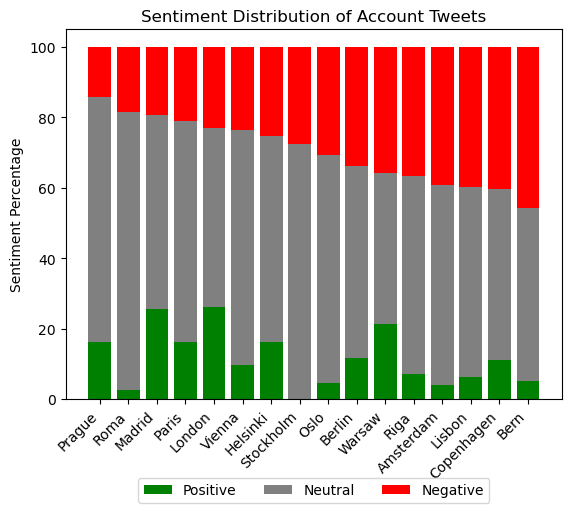

In [43]:
def plot_senti(df_res,tweets_type,plots_dir):
    df = df_rest.copy()
    # Define the cities in the desired order based on the value of senti_pre for Negative sentiment
    city_order = df[df['Sentimental_label'] == 'Negative'].sort_values('senti_pre')['City'].tolist()

    # Create a dictionary to store the sentiment percentages for each city
    sentiment_data = {}
    sentiments = ['Positive', 'Neutral', 'Negative']

    # Iterate over each city
    for city in city_order:
        # Filter the DataFrame for the current city
        city_df = df[df['City'] == city]

        # Retrieve the sentiment percentages for the current city
        sentiment_percentages = city_df.set_index('Sentimental_label')['senti_pre'].to_dict()

        # Store the sentiment percentages in the dictionary
        sentiment_data[city] = sentiment_percentages

    # Create a list of colors for each sentiment
    colors = ['green', 'gray', 'red']

    # Set the width of the bars
    bar_width = 0.5

    # Set the position of the bars on the x-axis
    x_pos = np.arange(len(city_order))

    # Plot the stacked bars for each sentiment
    bottom = np.zeros(len(city_order))

    for i, sentiment in enumerate(sentiments):
        percentages = [sentiment_data[city][sentiment] for city in city_order]
        plt.bar(x_pos, percentages, bottom=bottom, color=colors[i], label=sentiment)
        bottom += percentages

    # Set the x-axis labels
    plt.xticks(x_pos, city_order, rotation=45,ha='right')

    # Set the y-axis label
    plt.ylabel('Sentiment Percentage')

    # Set the chart title
    plt.title('Sentiment Distribution of Account Tweets')

    # Add a legend
    # plt.legend()
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(sentiments))

    plt.savefig(plots_dir+"senti_"+tweets_type+".png", bbox_inches='tight')
    plt.show()


In [ ]:
plot_senti(plot_res_account,'account',plots_dir)
plot_senti(plot_res_search,'search',plots_dir)

In [45]:
df_pivot_account = plot_res_account.pivot(index='City', columns='Sentimental_label', values='senti_pre')
df_pivot_search = plot_res_search.pivot(index='City', columns='Sentimental_label', values='senti_pre')

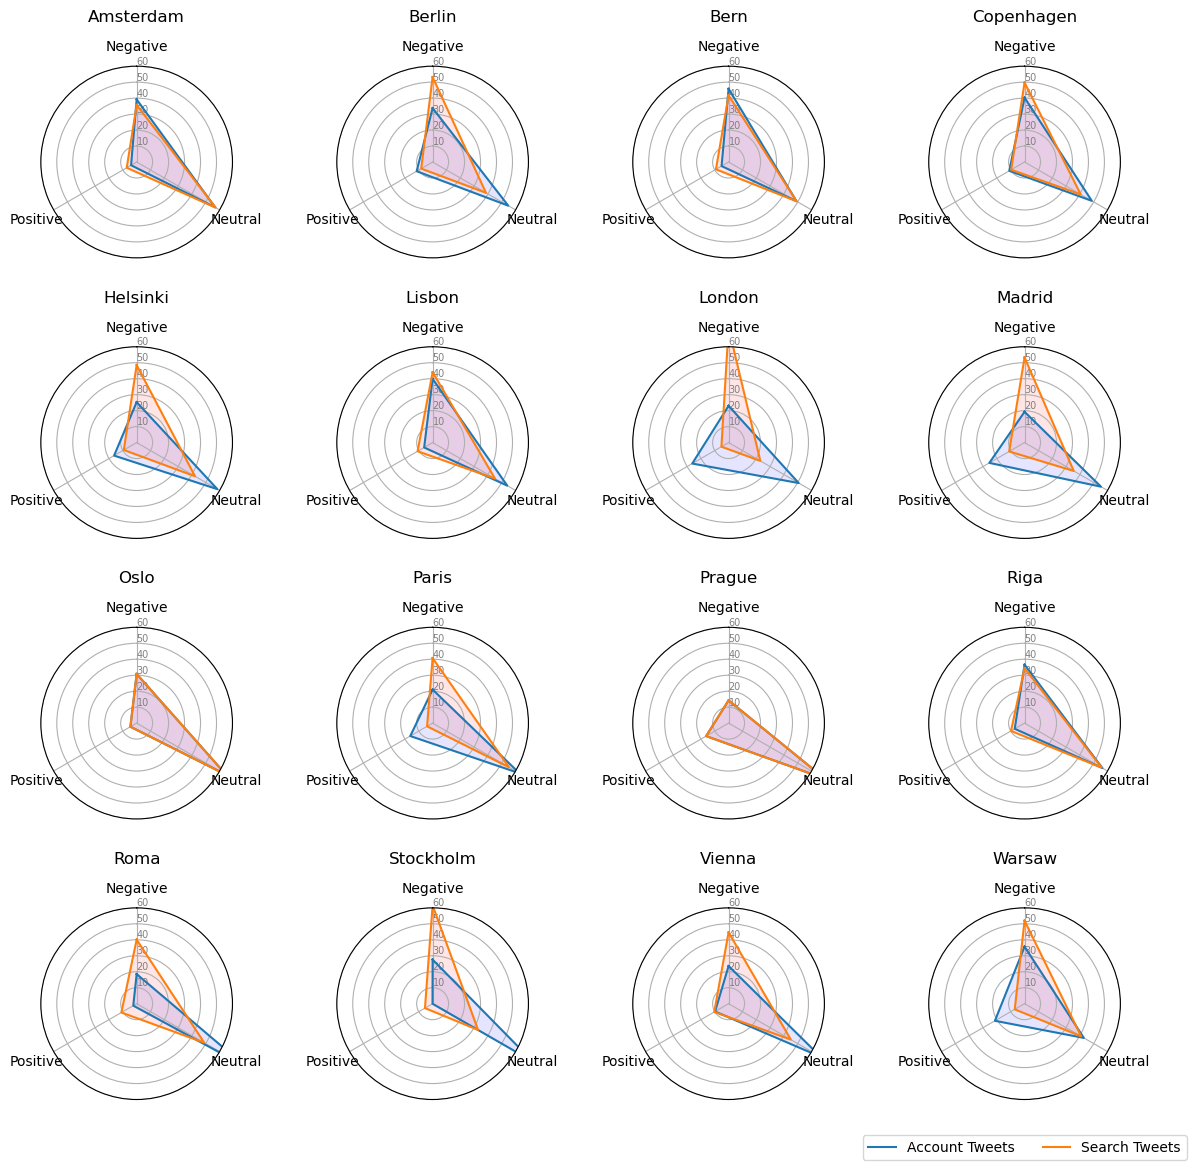

In [46]:
numbers = list(range(10, 101, 10))
numbers_as_strings = [str(num) for num in numbers]
    
# Create a 4x4 subplot grid
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Initialize the legend
legend_added = False

# Iterate over each city
for i, city in enumerate(df_pivot_account.index):
    # Get the corresponding row from df_pivot_acc and df_pivot_res
    acc_row = df_pivot_account.loc[city].to_dict()
    acc_row['group'] = 'Account Tweets'

    res_row = df_pivot_search.loc[city].to_dict()
    res_row['group'] = 'Search Tweets'

    # Create a new dataframe combining the account and search rows
    df = pd.concat([pd.DataFrame(acc_row, index=[0]), pd.DataFrame(res_row, index=[1])])

    # Set the current axes for the subplot
    ax = axs[i // 4, i % 4]

    # ------- PART 1: Create background

    # Number of variables
    categories = list(df)[:3]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(4, 4, i + 1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)

    

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(numbers, numbers_as_strings, color="grey", size=7)
    plt.ylim(0, 60)

    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't make a loop because plotting more than 3 groups makes the chart unreadable

    # Ind1
    values = df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1.5, linestyle='solid', label="Account Tweets")
    ax.fill(angles, values, 'b', alpha=0.1)

    # Ind2
    values = df.loc[1].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1.5, linestyle='solid', label="Search Tweets")
    ax.fill(angles, values, 'r', alpha=0.1)

    # Add title to the subplot
    ax.set_title(city, pad=30, va='bottom')

    # if not legend_added:
    #     ax.legend(loc='center', bbox_to_anchor=(0.5, -0.25), ncol=2)
    #     legend_added = True
        

ax.legend(loc='center', bbox_to_anchor=(0.5, -0.25), ncol=2)
# Adjust the spacing between subplots
fig.tight_layout()
plt.savefig(plots_dir+"senti_each.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()
